In [1]:
import os
import sys
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pickle

In [2]:
%load_ext autoreload
%autoreload 2

In [1034]:
# statmech library setup
sys.path.append('../../statmechlib')
from statmechlib.preprocessing import select_nodes, to_param_dict, to_param_list, insert_zero_params, rescale_manybody_params
from statmechlib.preprocessing import Trajectory, find_index, pair_dist_cutoff, universal_eos
from statmechlib.forcefields import utot_EAM_per_atom, utot_EAM_per_box, udif_print, u_core

In [986]:
target_proc = '../data/target_processed'
working = '../data/working'
reports = '../reports'
pot_path = '../sim/potentials'

In [269]:
params_file = 'marinica_params'
stats_file = 'stats_marinica'
target_file = 'target_marinica'
stats_file = 'stats_manyknots' # 'stats_samples'
target_file = 'target_manyknots' # 'target_samples'
params_file = 'marinica_params'
stats_file = 'stats_manymd' # 'stats_samples'
target_file = 'target_manymd' # 'target_samples'
#stats_file = 'stats_manyvac' # 'stats_samples'
#target_file = 'target_manyvac' # 'target_samples'

stats_file = 'stats_test' # 'stats_samples'
target_file = 'target_test' # 'target_samples'
stats_file = 'stats_manyall' # 'stats_samples'
target_file = 'target_manyall' # 'target_samples'
# stats_file = 'stats_everyzero' # 'stats_samples'
# target_file = 'target_everyzero' # 'target_samples'
# stats_file = 'stats_manyknots' # 'stats_samples'
# target_file = 'target_manyknots' # 'target_samples'
stats_md_file = 'stats_onlymd' # 'stats_samples'
target_md_file = 'target_onlymd' # 'stats_samples'
#stats_file = 'stats_everything' # 'stats_samples'
#target_file = 'target_everything' # 'target_samples'

In [283]:
with open(os.path.join(working, stats_md_file+'.pickle'), 'rb') as fi:
    stats_md = pickle.load(fi)
    
with open(os.path.join(working, target_md_file+'.pickle'), 'rb') as fi:
    targets_md = pickle.load(fi)

with open(os.path.join(working, stats_file+'.pickle'), 'rb') as fi:
    stats_all = pickle.load(fi)

with open(os.path.join(working, target_file+'.pickle'), 'rb') as fi:
    targets = pickle.load(fi)

with open(os.path.join(working, params_file + '.pickle'), 'rb') as fi:
    param_list = pickle.load(fi)  

In [284]:
# # extended knots
# pair_knots = [ 2.45, 2.5648975,  2.629795 ,  2.6946925,  2.8663175,  2.973045 ,
#         3.0797725,  3.5164725,  3.846445 ,  4.1764175,  4.700845 ,
#         4.8953   ,  5.089755 ,  5.3429525,  5.401695 ,  5.4604375, 5.78]
# edens_knots = [ 2.5,  3.1,  3.5,  4.9, 5.5]

# pair_knots = [ 2.5648975,  2.629795 ,  2.6946925,  2.8663175,  2.973045 ,
#         3.0797725,  3.5164725,  3.846445 ,  4.1764175,  4.700845 ,
#         4.8953   ,  5.089755 ,  5.3429525,  5.401695 ,  5.4604375]
# edens_knots = [ 2.5,  3.1,  3.5,  4.9]

# pair_knots = [ 2.3, 2.5648975,  2.629795 ,  2.6946925,  2.8663175,  2.973045 ,
#         3.0797725,  3.5164725,  3.846445 ,  4.1764175,  4.700845 ,
#         4.8953   ,  5.089755 ,  5.3429525,  5.401695 ,  5.4604375]
# edens_knots = [ 2.5,  3.1,  3.5,  4.9]

# pair_knots = [2.26, 2.5648975,  2.629795 ,  2.6946925,  2.8663175,  2.973045 ,
#         3.0797725,  3.5164725,  3.846445 ,  4.1764175,  4.700845 ,
#         4.8953   ,  5.089755 ,  5.3429525,  5.401695 ,  5.4604375]
# edens_knots = [ 2.5,  3.1,  3.5,  4.9]

# pair_knots = [2.26, 2.5648975,  2.629795 ,  2.6946925,  2.8663175,  2.973045 ,
#         3.0797725,  3.5164725,  3.846445 ,  4.1764175,  4.700845 ,
#         4.8953   ,  5.089755 ,  5.3429525,  5.401695 ,  5.4604375]
# edens_knots = [ 2.5,  3.1,  3.5,  4.9]

In [321]:
stats_all['hyperparams'], stats_md['hyperparams']

({u'edens': [2.1800000000000002,
   2.2200000000000002,
   2.2599999999999998,
   2.2999999999999998,
   2.3399999999999999,
   2.3799999999999999,
   2.4199999999999999,
   2.45,
   2.46,
   2.5,
   2.54,
   2.5648975,
   2.5800000000000001,
   2.6200000000000001,
   2.629795,
   2.6600000000000001,
   2.6946925,
   2.7000000000000002,
   2.7400000000000002,
   2.7799999999999998,
   2.8199999999999998,
   2.8599999999999999,
   2.8663175,
   2.8999999999999999,
   2.9399999999999999,
   2.973045,
   2.98,
   3.02,
   3.0600000000000001,
   3.0797725,
   3.1000000000000001,
   3.1400000000000001,
   3.1800000000000002,
   3.2200000000000002,
   3.2599999999999998,
   3.2999999999999998,
   3.3399999999999999,
   3.3799999999999999,
   3.4199999999999999,
   3.46,
   3.5,
   3.5164725,
   3.54,
   3.5800000000000001,
   3.6200000000000001,
   3.6600000000000001,
   3.7000000000000002,
   3.7400000000000002,
   3.7799999999999998,
   3.8199999999999998,
   3.846445,
   3.859999999999999

In [285]:
def downselect(stats_inp, pair_knots, edens_knots):
    
    # find idices of knots
    pair_index = find_index(pair_knots, stats_inp['hyperparams']['pair'])
    edens_index = find_index(edens_knots, stats_inp['hyperparams']['edens'])
    
    # create boolean arrays with select indices set to True
    p_ix = np.array([True if i in pair_index else False for i in range(len(stats_inp['hyperparams']['pair']))])
    m_ix = np.array([True if i in edens_index else False for i in range(len(stats_inp['hyperparams']['edens']))])

    stats_out = select_nodes(stats_inp, p_ix, m_ix)
    
    return stats_out

In [997]:
pair_knots = [2.22, 2.46, 2.5648975,  2.629795 ,  2.6946925,  2.8663175,  2.973045 ,
        3.0797725,  3.5164725,  3.846445 ,  4.1764175,  4.700845 ,
        4.8953   ,  5.089755 ,  5.3429525,  5.401695 ,  5.4604375]
edens_knots = [ 2.5, 2.8663175, 3.1,  3.5,  4.9, 5.4604375]

In [998]:
stats = downselect(stats_all, pair_knots, edens_knots)
print(stats['hyperparams'])
stats_select_md = downselect(stats_md, pair_knots, edens_knots)
print(stats_select_md['hyperparams'])

{u'pair': [2.2200000000000002, 2.46, 2.5648974999999998, 2.6297950000000001, 2.6946924999999999, 2.8663175000000001, 2.9730449999999999, 3.0797724999999998, 3.5164724999999999, 3.8464450000000001, 4.1764175000000003, 4.7008450000000002, 4.8952999999999998, 5.0897550000000003, 5.3429525, 5.4016950000000001, 5.4604375000000003], u'edens': [2.5, 2.8663175000000001, 3.1000000000000001, 3.5, 4.9000000000000004, 5.4604375000000003]}
{u'pair': [2.2200000000000002, 2.46, 2.5648974999999998, 2.6297950000000001, 2.6946924999999999, 2.8663175000000001, 2.9730449999999999, 3.0797724999999998, 3.5164724999999999, 3.8464450000000001, 4.1764175000000003, 4.7008450000000002, 4.8952999999999998, 5.0897550000000003, 5.3429525, 5.4016950000000001, 5.4604375000000003], u'edens': [2.5, 2.8663175000000001, 3.1000000000000001, 3.5, 4.9000000000000004, 5.4604375000000003]}


In [1002]:
targets['md'] = targets_md['md']
stats['md'] = stats_select_md['md']

In [1003]:
for key in sorted(targets.keys()):
    #if 'bcc_npt' not in key:
    #    continue
    for box, xyz, ene in zip(targets[key]['box'], targets[key]['xyz'], stats[key]['energy']):
        #print(np.linalg.det(box), len(xyz), len(ene), type(ene))
        n = len(xyz)
        vol = np.linalg.det(box)
        corr = float(n*n)/vol
        #print(n, corr)
        ene.append([corr])

In [1004]:
stats['relax']['energy'][-1]

[array([    0.        ,     0.        ,     0.        ,     0.        ,
            0.        ,    13.11559286,    36.1307184 ,    65.83125499,
          244.51189785,   440.29513277,   678.74835511,  1130.6608819 ,
         1321.53073724,  1526.79265974,  1815.90801022,  1886.6252085 ,
         1958.8718876 ]),
 array([  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   1.46179740e-02,
          8.33297012e-01,   9.17499985e+00,   1.74590462e+03,
          1.83567959e+04,   1.03672895e+05,   7.98311309e+05,
          1.48987813e+06,   2.65434578e+06,   5.31133547e+06,
          6.18825569e+06,   7.19195500e+06]),
 array([  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   1.35702986e+00,
          1.02816915e+01,   3.41277777e+01,   4.70799112e+02,
          1.52659439e+03,   3.62789681e+03,   1.00670955e+04,
          1.37528840e+04,   1.83568684e+04,   2.59671699e+04,
          2.80290089

In [1005]:
optimal_params = []
for params in param_list:
    eam_params = list(params['params']['embed']) + list(params['params']['pair']) + list(params['params']['edens'])
    #eam_params = list(params['params']['embed']) + [0.0] + list(params['params']['pair']) + [0.0] + list(params['params']['edens']) + [0.0]
    optimal_params.append((0.0, np.array(eam_params)))

In [1006]:
optimal_params[0][1][-4] = -4.20429107805

In [1007]:
# optimal_params.append((3.0674198658721691e-06, np.array([ -8.15036857e+00,  -1.34492508e-01,  -6.40562492e+02,
#         5.60045606e+02,  -1.62774419e+02,  -2.42163837e+01,
#         4.61349632e+01,  -1.21579989e+01,   6.09852042e-01,
#         1.39564841e+00,  -1.26608655e+00,  -7.44806685e-01,
#         2.00404873e+00,  -6.91376693e-01,   2.17652121e-02,
#        -1.61632910e+00,   1.37087609e+00,  -3.76175083e+01,
#         1.56626002e+00,  -1.74622706e-01,   3.14905374e-02])))
# optimal_params.append((2.2036185726499669e-06, np.array([ -6.70205913e+00,  -3.86729923e-02,  -6.36660911e+02,
#         7.48522323e+02,  -3.02289981e+02,   2.43903738e+01,
#         7.99267764e+00,  -5.00288982e+00,   3.98363657e-01,
#         1.18177686e+00,  -1.04440728e+00,  -7.34361783e-01,
#         2.03940754e+00,  -7.33324453e-01,   3.22601497e-02,
#        -1.68659097e+00,   1.39384190e+00,  -2.87086061e+01,

# 6.41466635e-01,  -5.25140182e-02,   3.13551914e-02])))
# optimal_params.append((1.9883954014792284e-06, np.array([ -6.67892458e+00,  -6.69057233e-02,  -7.88558288e+02,
#         8.64431119e+02,  -3.22117669e+02,   1.66223488e+01,
#         1.61253439e+01,  -7.08057431e+00,   3.36500438e-01,
#         1.23818786e+00,  -9.77125576e-01,  -7.10990440e-01,
#         1.96923157e+00,  -7.11735164e-01,   3.61922715e-02,
#        -1.61997750e+00,   1.35041921e+00,  -3.71430662e+01,
#         8.77780820e-01,  -5.71131123e-02,   3.98140807e-02])))
# optimal_params.append((0.0060326797097461976, np.array([ -8.13172851e+00,  -4.49702864e-02,   2.89657061e+02,
#         2.29284083e+01,  -3.62538768e+01,  -6.67077747e+00,
#        -5.21912803e+00,   3.34636693e+01,  -3.38738650e+00,
#         2.82512503e+00,  -2.35344355e+00,  -7.16503843e-01,
#         1.59333800e+00,  -1.52959697e-01,   3.37225608e-01,
#        -1.78309053e+00,   1.15621335e+00,   1.17451654e+02,
#         4.91780708e+00,  -8.03507275e-01,   3.10859811e-02])))
# optimal_params.append((0.0055046101872456114, np.array([ -8.27482341e+00,  -3.58322595e-02,  -3.04931926e+02,
#         2.67354545e+02,  -9.47559604e+01,  -6.28915309e+00,
#        -1.82080960e+00,   3.06675235e+01,  -3.02847087e+00,
#         2.68338299e+00,  -2.19529465e+00,  -7.72234170e-01,
#         1.46121652e+00,  -3.18762321e-02,   3.53838361e-01,
#        -1.78610521e+00,   1.13977276e+00,  -4.53379067e+01,
#         4.96626231e+00,  -7.84202283e-01,   3.18065305e-02])))
# optimal_params.append((0.0053604082908782083, np.array([ -9.42391613e+00,  -4.24391684e-02,  0.0, -2.94587357e+02,
#         2.70972700e+02,  -1.04787033e+02,  -2.98238182e+00,
#        -4.35229417e-01,   2.92307252e+01,  -3.93677905e+00,
#         3.09415379e+00,  -2.40064822e+00,  -8.22415578e-01,
#         1.49304711e+00,  -3.38081838e-02,   3.54435455e-01,
#        -1.76673992e+00,   1.15161862e+00,  0.0, -3.15350855e+01,
#         4.07693197e+00,  -7.52508632e-01,   3.10740894e-02, 0.0])))
# optimal_params.append((0.0022761996890569578, np.array([ -3.77590492e+00,  -1.16300006e-03,   5.84788559e+02,
#         -1.18968908e+02,   2.57663555e+02,  -1.11700585e+02,
#         -4.41069871e+00,   8.31759060e-01,   2.25589667e+01,
#         -7.29378311e+00,   7.50757832e+00,  -3.44935685e+00,
#         -6.89323571e-01,   1.12145202e+00,  -3.97761235e-01,
#          3.04014527e-01,  -1.66999650e+00,   1.65464460e+00,
#         -1.72777177e-01,   4.64906214e+02,   1.40386233e+01,
#         -2.01752844e+00,   2.68045065e-02,   3.86251315e-02])))
# optimal_params.append((0.00093953853450417092, np.array([ -9.03699707e+00,  -5.09767650e-02,  -2.18401511e-01,
#        -2.20639200e+02,   2.35340857e+02,  -8.86794492e+01,
#         3.33042935e+00,  -1.73170753e+01,   3.89683369e+01,
#        -3.62979727e+00,   2.62701453e+00,  -2.39880858e+00,
#        -7.83415512e-01,   1.46626900e+00,  -1.98490050e-02,
#         3.67087040e-01,  -1.73689278e+00,   1.13593236e+00,
#        -2.18095252e-02,  -7.29502441e+00,   4.33357052e+00,
#        -8.42945335e-01,   2.94745276e-02,   3.97488334e-04])))
# optimal_params.append((0.00067017901957554487, np.array([ -1.03168691e+01,  -1.88829016e-02,   1.01750064e+01,
#        -2.55507602e+02,   1.83144207e+02,  -6.41081549e+01,
#         2.73214546e+00,  -1.77929909e+01,   3.87893945e+01,
#        -4.03221177e+00,   2.61724094e+00,  -2.65319014e+00,
#        -7.76593490e-01,   1.48306407e+00,  -1.38813561e-03,
#         3.74788889e-01,  -1.71755814e+00,   1.14682046e+00,
#        -2.48621450e-02,  -2.95225136e+01,   4.02878458e+00,
#        -9.12240382e-01,   3.51716704e-02,  -6.33610273e-04])))
# optimal_params.append((0.00053053351515601802, np.array([ -1.05753261e+01,  -3.91439402e-02,   1.09340277e+03,
#        -6.20578820e+01,   1.24166010e+02,  -5.13821475e+01,
#         1.03553737e+01,  -2.46633699e+01,   3.90330612e+01,
#        -4.18168584e+00,   3.04618693e+00,  -2.86749335e+00,
#        -7.59663672e-01,   1.49032717e+00,  -1.11413817e-02,
#         3.91854035e-01,  -1.72421078e+00,   1.14159468e+00,
#        -1.59761663e-02,   9.53681300e+01,   3.76836534e+00,
#        -8.65878651e-01,   3.60934752e-02,  -3.96007206e-04])))
# optimal_params.append((0.00068775616564710745, np.array([ -7.22715451e+00,   1.36770670e-02,   6.08287533e+02,
#         -4.95516649e+01,   1.00304337e+02,  -1.22873371e+01,
#          1.26949213e+01,  -1.95219330e+01,   6.98107017e+00,
#          7.87934429e-01,   2.75444501e+00,  -2.49564014e+00,
#         -4.59396205e-01,   1.83350158e+00,  -5.69210235e-01,
#          1.06407836e-02,  -1.68404541e+00,   1.37943386e+00,
#          1.29019351e-02,   1.53466033e+02,  -8.19380660e-02,
#          7.97170191e-02,   1.60693189e-02,   5.25473654e-03])))
# optimal_params.append((0.00020007682343255515, np.array([ -1.86237626e+01,   3.88827878e-01,   5.08073060e+02,
#         -1.56241982e-01,   9.13274816e+01,   8.46874364e+00,
#          9.62667328e-02,  -2.55753841e+01,   1.38306900e+01,
#         -1.75380825e+00,   4.14968696e+00,  -2.52759010e+00,
#          3.62762238e-02,   2.29589530e+00,  -2.03825156e+00,
#         -3.59422684e-01,  -1.22818047e+00,   1.63768670e+00,
#          9.93572791e-02,   2.41139582e+01,  -2.10212634e-01,
#          7.65845646e-02,  -4.67780497e-03,   3.45306433e-03])))
# optimal_params.append((0.000249787410007989, np.array([ -7.36968480e+00,  -1.70805895e-02,   6.24648936e+02,
#          1.79908141e+02,   4.32034347e+01,   1.35608114e+01,
#         -4.80517977e+00,  -2.13648180e+01,   1.35099154e+01,
#         -4.30046393e-01,   4.10801086e+00,  -2.90517169e+00,
#          1.98373115e-01,   2.10851575e+00,  -1.85969864e+00,
#         -3.38931291e-01,  -1.32361744e+00,   1.81901997e+00,
#         -1.85357403e-02,   2.19138092e+02,  -4.70824704e-01,
#          3.82469722e-01,  -2.30415161e-02,   1.64440669e-02])))

In [1008]:
# optimal_params.append((1.3622962714975357e-06, np.array([ -5.49758866e+00,   2.27120114e-02,   1.26422186e+02,
#         -1.47683744e+02,   5.39454743e+01,  -3.80763976e+00,
#          8.67785533e+00,  -2.13633691e+00,   1.01229591e+00,
#          1.86328849e+00,  -1.27656406e+00,  -9.06185356e-01,
#          2.01903082e+00,  -7.66857231e-01,   4.11123134e-02,
#         -1.60638164e+00,   1.35810815e+00,   1.32806711e-02,
#          1.48479532e+00,   7.53409870e-02,   2.44361485e-02])))
# optimal_params.append((1.0774783839388264e-06, np.array([ -5.05409950e+00,   3.10101892e-02,  -5.10319960e+01,
#          6.31951961e+01,  -2.36343500e+01,  -8.77003128e-01,
#          1.20196233e+01,  -4.91524437e+00,   6.43742388e-01,
#          1.77565241e+00,  -1.09185318e+00,  -8.14786962e-01,
#          1.91116590e+00,  -8.23625726e-01,   3.30671224e-02,
#         -1.56149778e+00,   1.36228398e+00,  -1.27528622e+00,
#          1.32416528e+00,   9.12004780e-02,   2.84993027e-02])))
# optimal_params.append((1.039288234606759e-06, np.array([ -5.59433915e+00,  -7.93387112e-03,  -1.91160702e+01,
#         -1.26426712e+00,   7.61266222e+00,  -4.46969050e+00,
#          1.22452048e+01,  -1.81465259e+00,   6.85464897e-01,
#          1.99733423e+00,  -1.17402904e+00,  -8.22854267e-01,
#          1.92993744e+00,  -8.28119836e-01,   2.90861504e-02,
#         -1.53409608e+00,   1.34507332e+00,  -6.10520702e+00,
#          1.76219558e+00,   1.27996195e-01,   2.54527499e-02])))
# optimal_params.append((9.8249744141024839e-07, np.array([ -4.80244764e+00,  -1.57770413e-02,  -1.65201109e+02,
#          6.61397136e+01,   2.39642896e+00,  -8.17646351e+00,
#          1.59713546e+01,  -2.70048869e+00,   1.24820751e+00,
#          1.88543860e+00,  -1.13997863e+00,  -8.63165875e-01,
#          1.94826738e+00,  -8.11038954e-01,   3.82577732e-02,
#         -1.53655529e+00,   1.34461649e+00,  -5.32681539e+01,
#          2.69651392e+00,   2.78123977e-01,   4.45896631e-02])))
# optimal_params.append((9.1708800174879805e-07, np.array([ -4.29135714e+00,  -1.01572318e-02,  -1.23002416e+02,
#          3.37057538e+01,   1.51964158e+01,  -1.15123063e+01,
#          1.93449204e+01,  -3.24648899e+00,   1.68397378e+00,
#          1.46246156e+00,  -9.51644617e-01,  -8.76774904e-01,
#          1.96042985e+00,  -8.40706810e-01,   3.44421583e-02,
#         -1.53321343e+00,   1.35327510e+00,  -5.24372640e+01,
#          4.03778252e+00,   3.04559273e-01,   5.52189384e-02])))

In [1009]:
#optimal_params.append((9.1708800174879805e-07, np.array([ -4.29135714e+00,  -1.01572318e-02,  -1.23002416e+02,
#         3.37057538e+01,   1.51964158e+01,  -1.15123063e+01,
#         1.93449204e+01,  -3.24648899e+00,   1.68397378e+00,
#         1.46246156e+00,  -9.51644617e-01,  -8.76774904e-01,
#         1.96042985e+00,  -8.40706810e-01,   3.44421583e-02,
#        -1.53321343e+00,   1.35327510e+00,  -5.24372640e+01,
#         4.03778252e+00,   3.04559273e-01,   5.52189384e-02])))
#optimal_params.append(((9.0359311195513088e-07, np.array([ -4.23991557e+00,  -1.02493648e-02,  -1.77046090e+02,
#         7.90330915e+01,   1.94595231e+00,  -1.16742972e+01,
#         2.03509492e+01,  -3.32305734e+00,   1.69564879e+00,
#         1.39897018e+00,  -9.03737081e-01,  -8.68734245e-01,
#         1.96184236e+00,  -8.58674681e-01,   3.41494629e-02,
#        -1.53262456e+00,   1.36049280e+00,  -6.42617792e+01,
#         4.32423551e+00,   3.07104025e-01,   5.94036443e-02]))))
# optimal_params.append((8.9710060363567114e-07, np.array([ -4.18353755e+00,  -9.63668936e-03,  -1.00171035e+02,
#          1.90025394e+01,   2.15938317e+01,  -1.39759833e+01,
#          2.16332289e+01,  -3.29542126e+00,   1.70455674e+00,
#          1.41347064e+00,  -9.02958785e-01,  -8.62309098e-01,
#          1.95964588e+00,  -8.70527088e-01,   3.22342700e-02,
#         -1.53866121e+00,   1.37095441e+00,  -4.32896107e+01,
#          4.64461212e+00,   3.23329113e-01,   5.82061842e-02])))


# optimal_params.append((8.7421414571196454e-07, np.array([ -4.31249172e+00,  -9.93971047e-03,  -3.76018390e+01,
#         -1.14759006e+02,   1.72557600e+01,   2.66437414e+01,
#         -1.50817090e+01,   2.22342349e+01,  -3.62963119e+00,
#          1.62230813e+00,   1.18480877e+00,  -8.52354746e-01,
#         -8.38460594e-01,   1.98957701e+00,  -8.86622667e-01,
#          1.66082225e-03,  -1.54824194e+00,   1.39761513e+00,
#         -5.06767503e+01,   4.47029066e+00,   9.10205250e-02,
#          5.87302830e-02,   1.82639066e+00])))

# optimal_params.append((8.8257346852300666e-07, np.array([ -4.36548916e+00,  -1.11867827e-02,  -1.94093020e+01,
#         -1.40195282e+02,   4.53864231e+01,   1.49756180e+01,
#         -1.36031385e+01,   2.21581200e+01,  -4.61501041e+00,
#          2.06360250e+00,   1.12795645e+00,  -8.01200744e-01,
#         -8.58426028e-01,   1.95860157e+00,  -8.68817546e-01,
#          2.43936831e-02,  -1.54555297e+00,   1.38005891e+00,
#         -5.22754243e+01,   3.98209114e+00,   3.07369702e-01,
#          5.51658454e-02,   1.58601447e+00])))

# optimal_params.append((7.7620114750371335e-07, np.array([ -4.16739003e+00,  -4.97036785e-03,  -4.62426912e+02,
#          2.63469650e+02,   1.00253629e+01,   2.05151925e+01,
#         -1.36702712e+01,   2.29129977e+01,  -1.27210473e+01,
#          2.95533783e+00,   8.18470873e-01,  -7.89494754e-01,
#         -8.74455389e-01,   2.10177842e+00,  -9.22682795e-01,
#         -6.93852493e-02,  -1.52166575e+00,   1.40766925e+00,
#          1.52571934e+02,   3.37536873e-01,   6.89310740e-01,
#          4.87102227e-02,   2.79573955e+00])))

# optimal_params.append((8.4662311460477016e-07, np.array([ -4.25063877e+00,  -8.42423097e-03,   1.97184032e+02,
#         -3.94829480e+01,   4.06593664e+01,   7.33612852e+00,
#         -1.09581336e+01,   1.95459483e+01,  -4.25340373e+00,
#          1.25504213e+00,   1.21896374e+00,  -8.92117958e-01,
#         -8.23211840e-01,   1.97233653e+00,  -8.75779516e-01,
#          1.58480925e-02,  -1.54604172e+00,   1.39139443e+00,
#          1.05631765e+02,   3.83941299e+00,  -8.75153019e-02,
#          6.40078984e-02,  -9.58830335e+00])))

# optimal_params.append((8.4662311460477016e-07, np.array([ -4.25063877e+00,  -8.42423097e-03,   1.97184032e+02,
#         -3.94829480e+01,   4.06593664e+01,   7.33612852e+00,
#         -1.09581336e+01,   1.95459483e+01,  -4.25340373e+00,
#          1.25504213e+00,   1.21896374e+00,  -8.92117958e-01,
#         -8.23211840e-01,   1.97233653e+00,  -8.75779516e-01,
#          1.58480925e-02,  -1.54604172e+00,   1.39139443e+00,
#          1.05631765e+02,   3.83941299e+00,  -8.75153019e-02,
#          6.40078984e-02,  0.0])))

optimal_params = [(0.0, np.array([ -5.94645400e+00,  -4.94770000e-02,  0.0, 0.0, 9.60851701e+01,
          -1.84410924e+02,   9.35784080e+01,  -7.98358265e+00,
           7.47034093e+00,  -1.52756044e+00,   1.25205933e+00,
           1.63082162e+00,  -1.41854775e+00,  -8.19936046e-01,
           1.98013514e+00,  -6.96430180e-01,   3.04546910e-02,
          -1.63131143e+00,   1.38409896e+00,  -4.20429108e+00, 0.0,
           5.18217702e-01,   5.62720800e-02,   3.44164179e-02, 0.0]))]

# optimal_params.append((8.1367636456716867e-07, np.array([ -4.37766201e+00,  -7.24640412e-03,   2.88043716e+02,
#          1.70758531e+02,  -5.20679543e+01,   2.74892868e+01,
#         -1.21025175e+01,   1.97446416e+01,  -4.82224690e+00,
#          8.99714082e-01,   1.27102898e+00,  -9.36295916e-01,
#         -7.92087243e-01,   1.99845685e+00,  -8.91622082e-01,
#         -3.01913883e-03,  -1.54847251e+00,   1.39556011e+00,
#          2.56600859e+02,   3.32379084e+00,  -2.47226640e-01,
#          6.26300159e-02,   2.70122544e+00])))

# optimal_params.append((8.1027772345253939e-07, np.array([ -4.41712815e+00,  -7.57807965e-03,   2.79276814e+02,
#          1.74479561e+02,  -6.59620942e+01,   3.53977481e+01,
#         -1.40546374e+01,   2.11913467e+01,  -4.95603366e+00,
#          8.26392820e-01,   1.26391280e+00,  -9.48799563e-01,
#         -7.79099318e-01,   2.00268261e+00,  -8.90495881e-01,
#         -8.59210993e-03,  -1.54948191e+00,   1.39577855e+00,
#          2.43904610e+02,   3.47694754e+00,  -3.14999583e-01,
#          6.33069119e-02,   5.60287637e+00])))


# optimal_params.append((8.1027772345253939e-07, np.array([ -4.41712815e+00,  -7.57807965e-03,   0.0, 2.79276814e+02,
#          1.74479561e+02,  -6.59620942e+01,   3.53977481e+01,
#         -1.40546374e+01,   2.11913467e+01,  -4.95603366e+00,
#          8.26392820e-01,   1.26391280e+00,  -9.48799563e-01,
#         -7.79099318e-01,   2.00268261e+00,  -8.90495881e-01,
#         -8.59210993e-03,  -1.54948191e+00,   1.39577855e+00,
#          2.43904610e+02,   3.47694754e+00,  -3.14999583e-01,
#          6.33069119e-02,   0.0])))

# optimal_params.append((4.6345862199192219e-06, np.array([ -6.22990030e+00,  -2.39482713e-02,   1.97795530e-03,
#          5.92835786e+02,   1.20686913e+02,   1.30630364e+02,
#         -4.61059934e+01,  -6.13023735e+00,   2.13136161e+01,
#         -4.03411152e+00,  -1.14565827e+00,  -1.48504397e+00,
#         -4.26626883e-02,  -1.12893429e+00,   2.30520359e+00,
#         -7.41998041e-01,  -3.83355284e-03,  -1.39837365e+00,
#          1.22070700e+00,   2.47226811e+02,   3.90391361e+00,
#         -2.07089632e+00,   9.96430946e-02,   2.67808634e-04])))

# optimal_params.append((4.9129896628165781e-06, np.array([ -2.68378965e+00,  -4.78737963e-04,  -8.05176331e-01,
#          4.23831149e+02,   2.81421959e+02,   1.97440022e+02,
#         -1.37112559e+02,   2.30459185e+01,  -4.68979921e-01,
#         -8.01853722e+00,   3.93990721e+00,  -6.44539947e-01,
#         -6.20014405e-02,  -8.05113331e-01,   1.83266618e+00,
#         -9.20071902e-01,  -4.65876004e-02,  -1.45933934e+00,
#          1.40856261e+00,   1.69589369e+03,  -2.79720215e+00,
#          2.13770889e+00,   1.49861032e-01])))
# optimal_params.append((3.1425108087653716e-06, np.array([ -2.73197746e+00,   2.15216816e-04,  -8.27473963e+02,
#          3.55520255e+02,  -4.74042369e+02,   4.27151271e+02,
#         -1.24743880e+02,   5.34573850e+00,   1.45075618e+01,
#         -1.14820559e+01,   5.72371150e+00,  -2.13110538e+00,
#          2.33310400e-01,  -7.12734634e-01,   1.81839287e+00,
#         -8.77946258e-01,  -6.25239226e-02,  -1.45100072e+00,
#          1.36487124e+00,   2.02815709e+02,   5.26703783e+00,
#          6.09491191e-01,   1.36086282e-01])))

# optimal_params.append((8.3833178850595479e-07, np.array([ -4.32380769e+00,  -8.26174715e-03,  -1.15560651e-04,
#          2.09172345e+02,  -3.97083023e+01,   4.18459252e+01,
#          7.30374374e+00,  -1.11955543e+01,   1.96574464e+01,
#         -4.26256538e+00,   1.24597213e+00,   1.20460572e+00,
#         -8.78629078e-01,  -8.12569336e-01,   1.96769967e+00,
#         -8.78060476e-01,   1.55042520e-02,  -1.54882839e+00,
#          1.38799320e+00,   1.10047406e+02,   3.74744685e+00,
#         -8.95351481e-02,   6.17313703e-02])))

# optimal_params.append((8.7421414571196454e-07, np.array([ -4.31249172e+00,  -9.93971047e-03, 0.0, -3.76018390e+01,
#         -1.14759006e+02,   1.72557600e+01,   2.66437414e+01,
#         -1.50817090e+01,   2.22342349e+01,  -3.62963119e+00,
#          1.62230813e+00,   1.18480877e+00,  -8.52354746e-01,
#         -8.38460594e-01,   1.98957701e+00,  -8.86622667e-01,
#          1.66082225e-03,  -1.54824194e+00,   1.39761513e+00,
#         -5.06767503e+01,   4.47029066e+00,   9.10205250e-02,
#          5.87302830e-02]))) #,   1.82639066e+00

# optimal_params.append((8.1250798489559791e-07, np.array([ -4.27892551e+00,  -5.24587702e-03,  -5.57980096e+02,
#          2.08569713e+02,   3.80008488e+01,   1.81224700e+00,
#          1.54595154e+01,  -1.08395781e+01,   1.90780717e+01,
#         -4.73003632e+00,   1.17490777e+00,   1.08892629e+00,
#         -8.68821283e-01,  -7.91866480e-01,   1.97246222e+00,
#         -8.85667541e-01,   8.27194906e-03,  -1.55127227e+00,
#          1.39261611e+00,   1.54811101e+02,   3.60769420e+00,
#         -2.31289650e-01,   6.23978185e-02])))

# optimal_params.append((7.8021164942004827e-07, np.array([ -3.98871711e+00,  -2.44375769e-03,  -8.36429119e+02,
#          2.00214811e+02,   6.09765728e+01,  -2.17556285e+01,
#          2.73304017e+01,  -1.31124746e+01,   2.01061286e+01,
#         -5.62480768e+00,   9.98429235e-01,   1.21906343e+00,
#         -9.84450843e-01,  -7.07461009e-01,   1.97973669e+00,
#         -9.15140372e-01,  -3.74468003e-02,  -1.55735741e+00,
#          1.43133936e+00,   1.90126624e+02,   3.64466806e+00,
#         -2.93075017e-01,   7.01639824e-02])))

# optimal_params.append((7.7799985353125938e-07, np.array([ -3.91475071e+00,  -3.18833461e-03,  -7.37124021e+02,
#          2.23383357e+02,   9.01948241e+01,  -3.51596924e+01,
#          3.15714136e+01,  -1.39034112e+01,   2.07549574e+01,
#         -5.72446724e+00,   8.88308215e-01,   1.25569595e+00,
#         -9.94558188e-01,  -7.00015224e-01,   1.98302690e+00,
#         -9.18391221e-01,  -4.22084319e-02,  -1.56102695e+00,
#          1.43988518e+00,   2.27701705e+02,   3.80702595e+00,
#         -3.47117647e-01,   7.63947436e-02])))

# optimal_params.append((7.7598178840335949e-07, np.array([ -3.83941975e+00,  -3.25610049e-03,  -6.98402475e+02,
#          2.57119905e+02,   1.34752272e+02,  -4.28139668e+01,
#          3.00399954e+01,  -1.29550960e+01,   1.98802247e+01,
#         -5.48953801e+00,   8.51960615e-01,   1.25718763e+00,
#         -1.00036821e+00,  -6.95536165e-01,   1.98898864e+00,
#         -9.15368120e-01,  -5.17527170e-02,  -1.56672725e+00,
#          1.44900080e+00,   2.98444914e+02,   3.84162304e+00,
#         -3.67028046e-01,   8.04355711e-02, 0.0])))

# optimal_params.append((7.7085182456423262e-07, np.array([ -3.89083945e+00,  -2.88247127e-03,  -7.84894273e+02,
#          2.26003183e+02,   7.26327094e+01,  -2.29201224e+01,
#          2.75955749e+01,  -1.31090771e+01,   1.97883217e+01,
#         -5.21606961e+00,   8.67502752e-01,   1.25850365e+00,
#         -9.98675359e-01,  -6.97579583e-01,   1.99555510e+00,
#         -9.21203241e-01,  -5.34223740e-02,  -1.56789257e+00,
#          1.45108489e+00,   2.24836739e+02,   3.88405425e+00,
#         -3.44648292e-01,   8.12168921e-02,  -2.08366435e-03])))

# optimal_params.append((7.7093659083748356e-07, np.array([ -3.76466530e+00,  -2.12843495e-03,  -8.24302813e+02,
#          2.09423724e+02,   5.27097157e+01,  -2.13335219e+01,
#          2.97417026e+01,  -1.39121010e+01,   2.05566570e+01,
#         -5.94951850e+00,   9.49646381e-01,   1.27049482e+00,
#         -1.01338843e+00,  -6.99011858e-01,   1.98965179e+00,
#         -9.15628357e-01,  -5.59204213e-02,  -1.56759760e+00,
#          1.45222825e+00,   2.09928332e+02,   3.88245113e+00,
#         -3.15806662e-01,   7.90180732e-02,   3.57672083e-04])))

# optimal_params.append((7.6862456017590172e-07, np.array([ -3.79270052e+00,  -1.98337827e-03,  -8.78430768e+02,
#          2.07700771e+02,   5.43207763e+01,  -1.93409767e+01,
#          2.75015369e+01,  -1.27627700e+01,   1.92876666e+01,
#         -5.30674319e+00,   1.00296945e+00,   1.24980734e+00,
#         -1.00927624e+00,  -6.99666151e-01,   1.99113152e+00,
#         -9.17065014e-01,  -5.99157821e-02,  -1.56708323e+00,
#          1.45406154e+00,   2.09734509e+02,   3.90057520e+00,
#         -2.74400706e-01,   7.37802102e-02,   1.00452584e-03])))

# optimal_params.append((7.6822126276766316e-07, np.array([ -3.80093039e+00,  -2.01908326e-03,  -8.92138320e+02,
#          2.14963058e+02,   4.54559872e+01,  -1.47031637e+01,
#          2.65454921e+01,  -1.26579036e+01,   1.91094644e+01,
#         -5.27448627e+00,   1.02935486e+00,   1.25299395e+00,
#         -1.01575470e+00,  -7.00672155e-01,   1.99280481e+00,
#         -9.18356823e-01,  -5.94427165e-02,  -1.56731254e+00,
#          1.45471628e+00,   2.07106526e+02,   3.85770393e+00,
#         -2.58119815e-01,   7.31870112e-02,   1.13704713e-03])))

# optimal_params.append((7.6662480223766291e-07, np.array([ -3.84081361e+00,  -2.52860216e-03,  -8.14807831e+02,
#          2.19872536e+02,   4.82911879e+01,  -1.47157777e+01,
#          2.58412876e+01,  -1.23017006e+01,   1.88425799e+01,
#         -5.17560150e+00,   1.02306057e+00,   1.27913581e+00,
#         -1.00895105e+00,  -7.00538338e-01,   1.98961922e+00,
#         -9.18979851e-01,  -6.21392158e-02,  -1.56762422e+00,
#          1.45805617e+00,   2.06092313e+02,   3.71609748e+00,
#         -2.05629712e-01,   7.39832440e-02,   2.74584917e-08])))

optimal_params.append((7.6218753622914876e-07, np.array([ -3.84574998e+00,  -2.75188273e-03,  -8.06711791e+02,
         2.29610758e+02,   4.29427680e+01,  -1.22381848e+01,
         2.55419976e+01,  -1.13370166e+01,   1.83363839e+01,
        -4.89796632e+00,   1.08544308e+00,   1.28739856e+00,
        -1.02204195e+00,  -6.94093890e-01,   1.99497233e+00,
        -9.24784533e-01,  -7.26359183e-02,  -1.56632503e+00,
         1.46500481e+00,   2.07433104e+02,   5.79858246e-01,
         3.67666749e+00,  -1.48029218e-01,   7.21144718e-02,
         1.68557562e-13])))

# optimal_params.append((2.8721920840286986e-06, np.array([ -2.96633342e+00,   1.46158140e-04,  -5.18563656e+02,
#          3.13594382e+02,  -4.75197102e+02,   4.03209002e+02,
#         -1.15717265e+02,   6.50834932e+00,   1.42600035e+01,
#         -1.49804766e+01,   7.61232801e+00,  -2.97368483e+00,
#          7.55679143e-01,  -9.93831486e-01,   1.95456534e+00,
#         -8.76384307e-01,  -1.38485871e-01,  -1.46413953e+00,
#          1.42872517e+00,   7.33553644e+01,   9.66675376e-01,
#          2.17658876e+00,   6.23949512e-02,   6.21461742e-03])))

# optimal_params.append((2.8650984484543364e-06, np.array([ -2.95342186e+00,   5.04725786e-04,  -5.07766876e+02,
#          3.04668522e+02,  -4.68741047e+02,   3.91993841e+02,
#         -1.10369101e+02,   5.20537159e+00,   1.53424503e+01,
#         -1.54336544e+01,   7.51592831e+00,  -2.98546886e+00,
#          7.52568215e-01,  -1.00684911e+00,   1.96640677e+00,
#         -8.71653694e-01,  -1.41685870e-01,  -1.46522734e+00,
#          1.42918520e+00,   6.16818729e+01,   1.00902487e+00,
#          2.01834018e+00,   6.23759472e-02,   7.28687426e-03])))
optimal_params.append((2.8409889781888168e-06, np.array([ -3.13105657e+00,   4.16188962e-04,  -5.11280416e+02,
         3.13866154e+02,  -4.70972043e+02,   4.00047544e+02,
        -1.14943156e+02,   2.67116055e+00,   1.48571164e+01,
        -1.49385293e+01,   7.81157073e+00,  -3.12057096e+00,
         8.35762684e-01,  -1.03874347e+00,   1.96856309e+00,
        -8.54812465e-01,  -1.53077108e-01,  -1.46000290e+00,
         1.42659709e+00,   6.46705228e+01,  -4.48180986e+00,
         1.47926727e+00,   2.01461564e+00,   5.15148729e-02,
         5.46299835e-03])))


print(optimal_params), len(optimal_params[1][1])

[(0.0, array([ -5.94645400e+00,  -4.94770000e-02,   0.00000000e+00,
         0.00000000e+00,   9.60851701e+01,  -1.84410924e+02,
         9.35784080e+01,  -7.98358265e+00,   7.47034093e+00,
        -1.52756044e+00,   1.25205933e+00,   1.63082162e+00,
        -1.41854775e+00,  -8.19936046e-01,   1.98013514e+00,
        -6.96430180e-01,   3.04546910e-02,  -1.63131143e+00,
         1.38409896e+00,  -4.20429108e+00,   0.00000000e+00,
         5.18217702e-01,   5.62720800e-02,   3.44164179e-02,
         0.00000000e+00])), (7.621875362291488e-07, array([ -3.84574998e+00,  -2.75188273e-03,  -8.06711791e+02,
         2.29610758e+02,   4.29427680e+01,  -1.22381848e+01,
         2.55419976e+01,  -1.13370166e+01,   1.83363839e+01,
        -4.89796632e+00,   1.08544308e+00,   1.28739856e+00,
        -1.02204195e+00,  -6.94093890e-01,   1.99497233e+00,
        -9.24784533e-01,  -7.26359183e-02,  -1.56632503e+00,
         1.46500481e+00,   2.07433104e+02,   5.79858246e-01,
         3.67666749e+00,  

In [1010]:
def plot_udif(targets, stats, traj_name, selected_params, select=slice(None, None, None), x_lim=None, y_lim=None, x_ticks=None, shift=0.0):

    plt.figure(figsize=(20,10))

    plt.title(traj_name)
    
    # get target energies
    opti_out, targ_out = udif_print(selected_params[0][1], targets, stats, utot_EAM_per_atom)

    #number of atoms in each configuration of this trajectory
    nat = np.array([len(x) for x in targets[traj_name]['xyz']])[select]
    #print(list(nat))
    
    # plot target energies
    #plt.plot(np.array(targ_out[traj_name])[select]/nat, 'o', label='target', markersize=5)
    plt.plot(np.array(targ_out[traj_name])[select], 'o', label='target', markersize=5)


    # get and plot optimized model energies
    for i, params in enumerate(selected_params):
        opti_out, targ_out = udif_print(params[1], targets, stats, utot_EAM_per_atom)
        #plt.plot(np.array([o for o in np.array(opti_out[traj_name])[select]])/nat, 'x--', label='optimized '+str(i))
        plt.plot(np.array([o for o in np.array(opti_out[traj_name])[select]])+shift, '.--', label='optimized '+str(i))

    plt.legend(loc='best')#fontsize=30)
    
    # special requirements on axes
    if x_lim:
        plt.xlim(*x_lim)
    if y_lim:
        plt.ylim(*y_lim)
    if x_ticks:
        plt.xticks(*x_ticks)
    
    plt.xlabel('configuration #', fontsize=30)
    plt.ylabel('Energy [eV]', fontsize=30)
    
    plt.grid(True)
    
    plt.savefig(os.path.join(reports, traj_name+'.png'))

In [1011]:
905/108.*128

1072.5925925925926

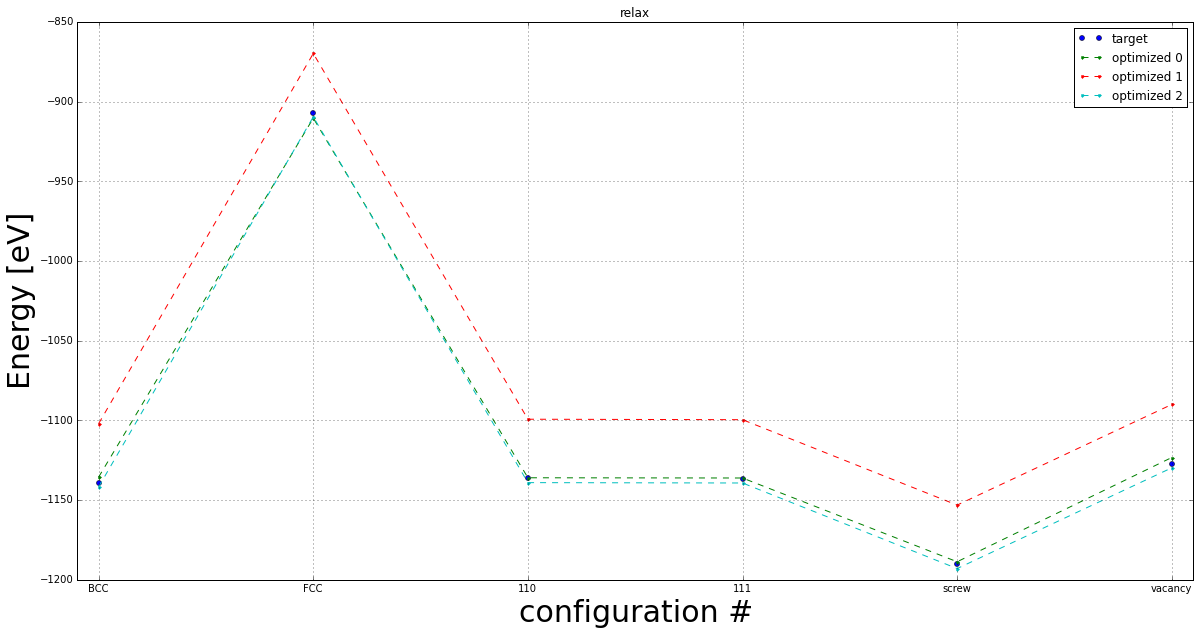

In [1012]:
# plot relax
x_ticks = ([0, 1, 2, 3, 4, 5], ['BCC', 'FCC','110','111', 'screw', 'vacancy'])
x_lim=(-0.1, 5.1)
slice_end = len(x_ticks[0])
select = slice(0, slice_end, None)
plot_udif(targets, stats, 'relax', optimal_params, select=select, x_ticks=x_ticks, x_lim=x_lim, shift=0)#-37)#-36)

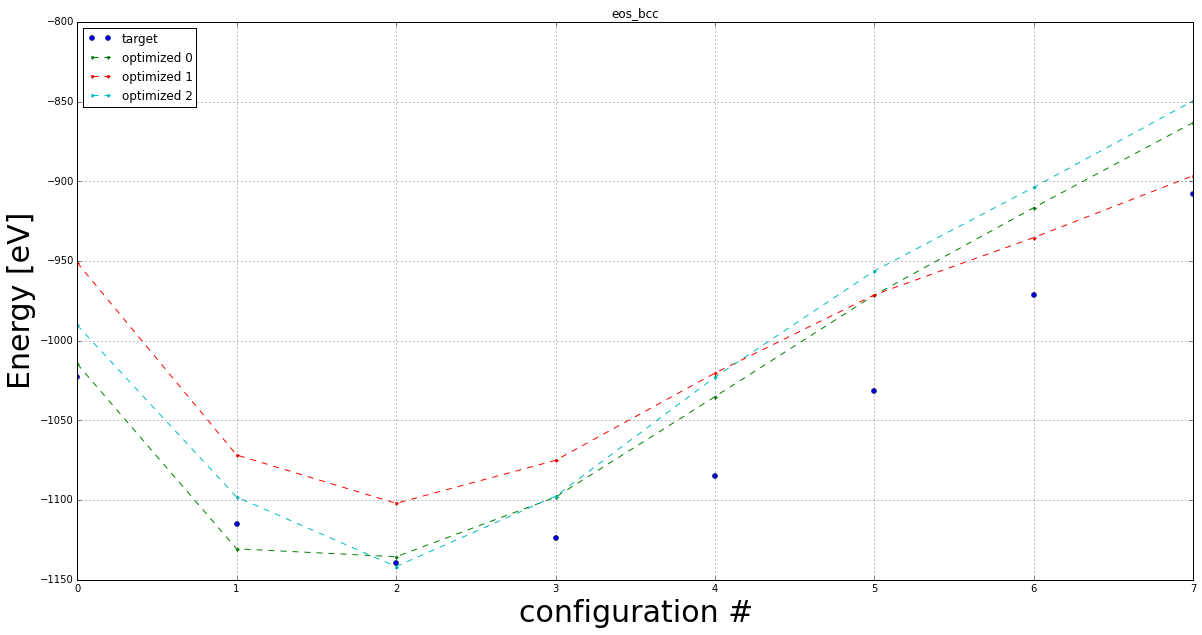

In [1013]:
# plot bcc EOS
select = [10, 11, 6, 3, 4, 5, 7, 2, 1, 12, 13, 14, 15, 16, 17, 18]
select = [1, 2, 0, 3, 4, 5, 6, 7]
x_lim = (2, 8)
y_lim = (-9.0, -7.0)
plot_udif(targets, stats, 'eos_bcc', optimal_params, shift=0, select=select)#, x_lim=x_lim, y_lim=y_lim)

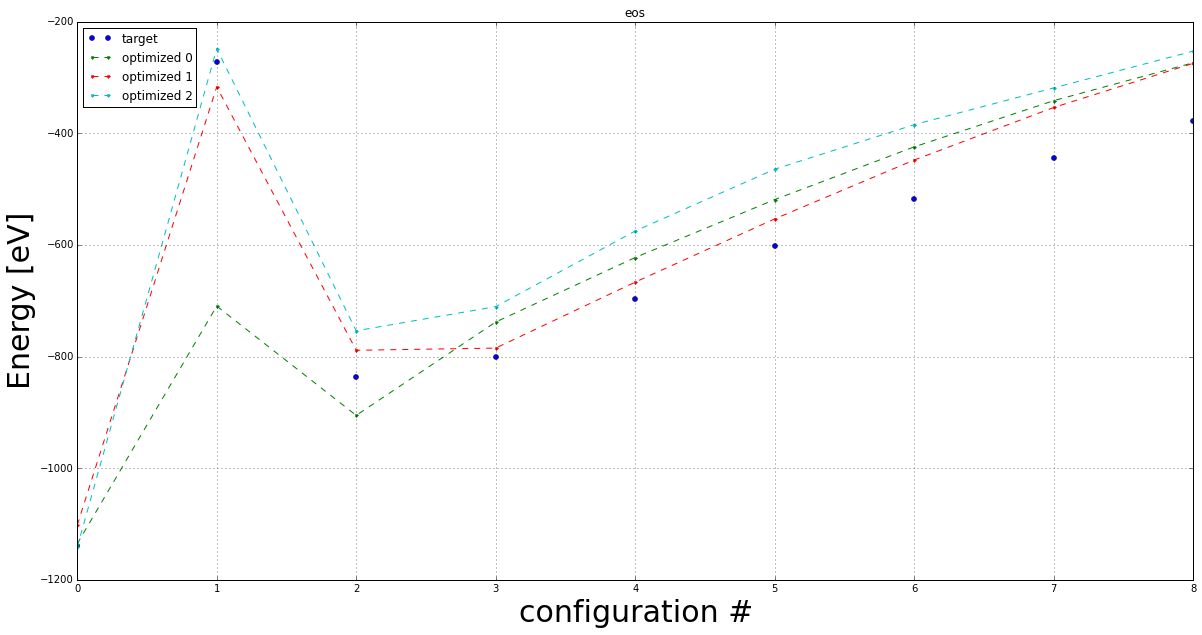

In [1014]:
#select = [10, 11, 6, 3, 4, 5, 7, 2, 1, 12, 13, 14, 15, 16, 17, 18]
#x_lim = (2, 8)
#y_lim = (-9.0, -7.0)
plot_udif(targets, stats, 'eos', optimal_params, shift=0)#-36)#, select=select)#, x_lim=x_lim, y_lim=y_lim)

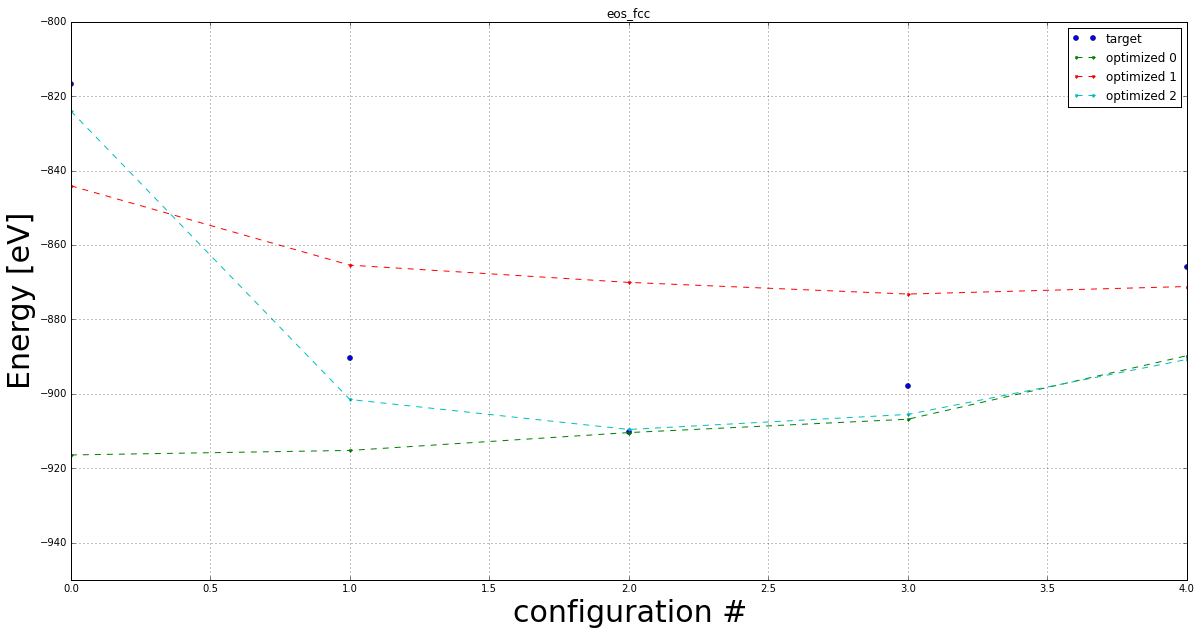

In [1015]:
# plot fcc EOS
#select = [1, 2, 3, 0, 5, 6, 7, 4]
select = [1, 2, 0, 3, 4]
x_lim = (0, 4)
y_lim = (-950, -800)
plot_udif(targets, stats, 'eos_fcc', optimal_params, x_lim=x_lim, y_lim=y_lim, select=select, shift=0)#-36)#, select=select)

In [1016]:
# # plot MD trajectories
# x_lim = (2.8,8.2)
# y_lim = (-2250,-2100)
# #x_lim = (-0.2,2.2)
# #y_lim = (-3880,-3780)

# plot_udif(targets, stats, 'vacint', optimal_params, x_lim=x_lim, y_lim=y_lim)#, shift=-80)
# plot_udif(targets, stats, 'vacint', optimal_params, shift=-78, x_lim=x_lim, y_lim=y_lim)#, shift=-24.2)
#108/128.*37

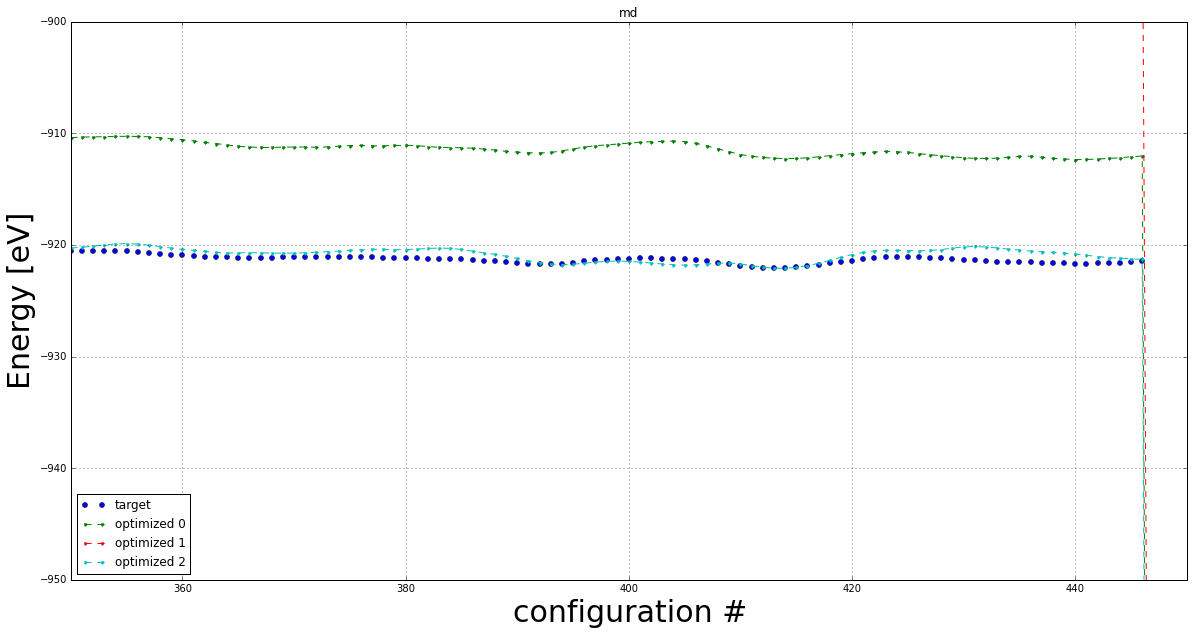

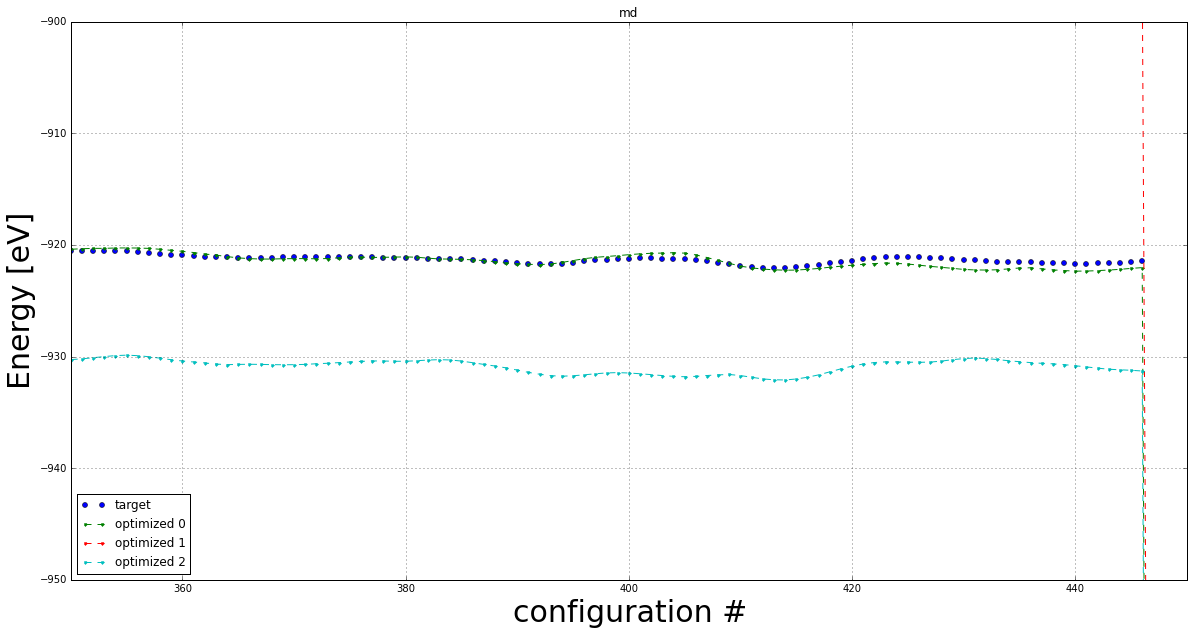

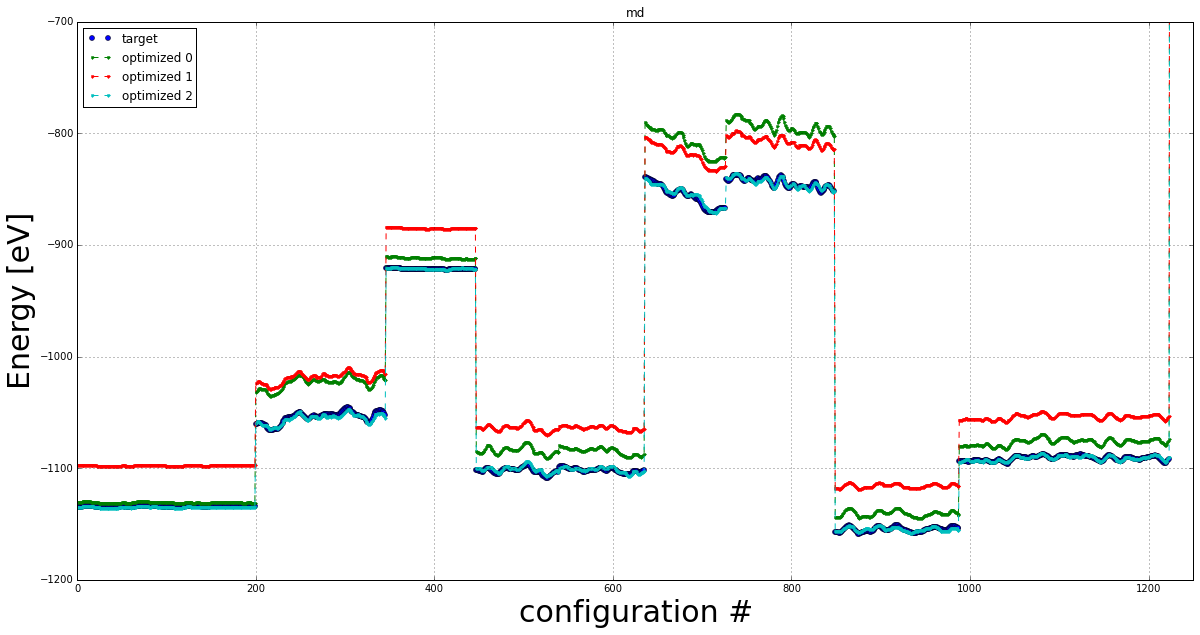

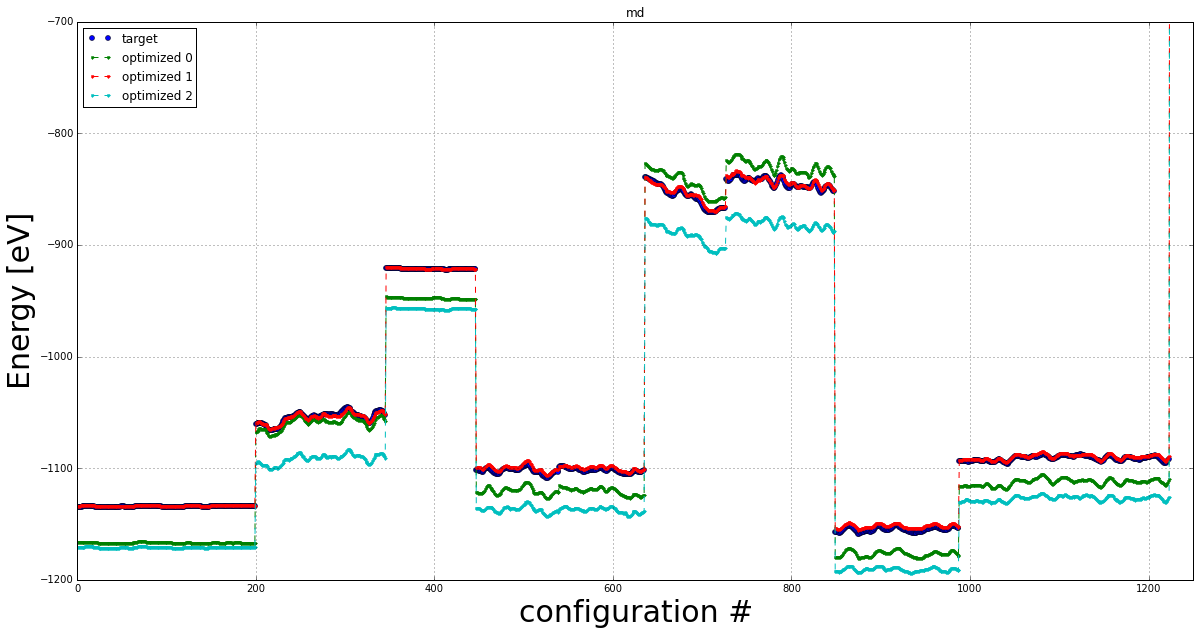

In [1017]:
# plot MD trajectories
x_lim = (350,520)
x_lim = (650, 900)
x_lim = (350,450)
#x_lim = (0,200)
#x_lim = (930, 1020)
#x_lim = (200, 380)
#x_lim = (1120, 1200)
y_lim = (-900,-780)
#y_lim = (-1140,-1090)
y_lim = (-940,-880)
y_lim = (-880, -820)
y_lim = (-950,-900)
#y_lim = (-1075, -1035)


plot_udif(targets, stats, 'md', optimal_params, x_lim=x_lim, y_lim=y_lim, shift=0)
plot_udif(targets, stats, 'md', optimal_params, x_lim=x_lim, y_lim=y_lim, shift=-10)
x_lim = (0, 1250)
y_lim = (-1200, -700)
plot_udif(targets, stats, 'md', optimal_params[:], x_lim=x_lim, y_lim=y_lim, shift=0)
plot_udif(targets, stats, 'md', optimal_params[:], x_lim=x_lim, y_lim=y_lim, shift=-36)

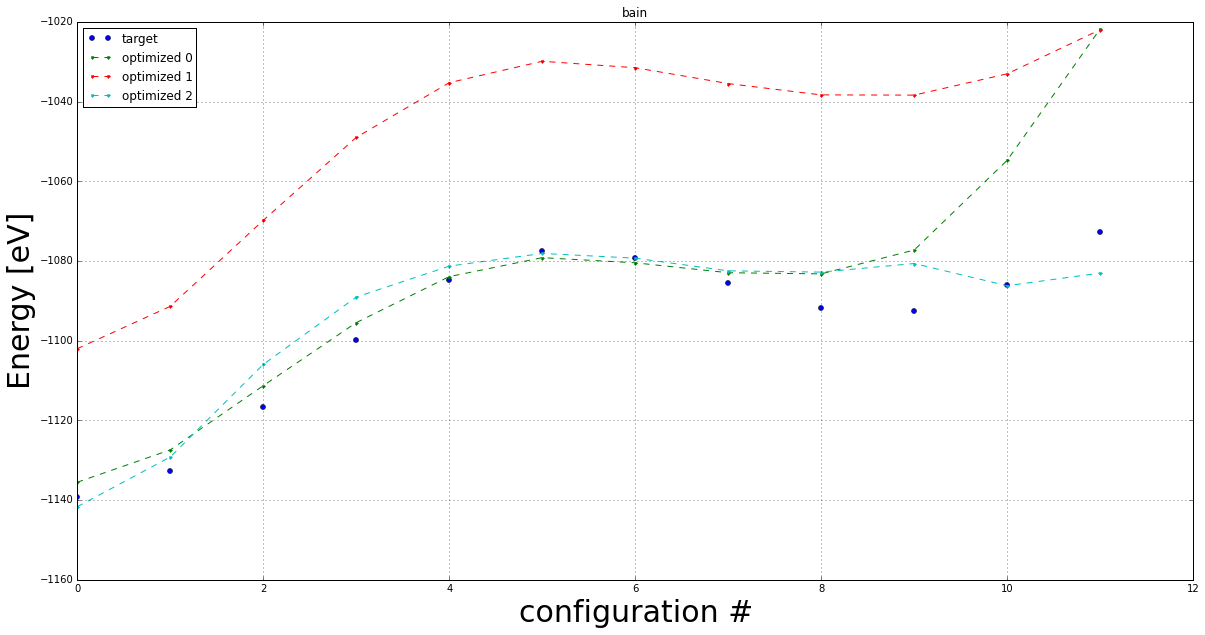

In [1018]:
# plot MD trajectories
x_lim = (380,420)
y_lim = (-900,-780)
plot_udif(targets, stats, 'bain', optimal_params, shift=0)#-36.0)#, x_lim=x_lim, y_lim=y_lim)

In [1019]:
optimal_params

[(0.0, array([ -5.94645400e+00,  -4.94770000e-02,   0.00000000e+00,
           0.00000000e+00,   9.60851701e+01,  -1.84410924e+02,
           9.35784080e+01,  -7.98358265e+00,   7.47034093e+00,
          -1.52756044e+00,   1.25205933e+00,   1.63082162e+00,
          -1.41854775e+00,  -8.19936046e-01,   1.98013514e+00,
          -6.96430180e-01,   3.04546910e-02,  -1.63131143e+00,
           1.38409896e+00,  -4.20429108e+00,   0.00000000e+00,
           5.18217702e-01,   5.62720800e-02,   3.44164179e-02,
           0.00000000e+00])),
 (7.621875362291488e-07,
  array([ -3.84574998e+00,  -2.75188273e-03,  -8.06711791e+02,
           2.29610758e+02,   4.29427680e+01,  -1.22381848e+01,
           2.55419976e+01,  -1.13370166e+01,   1.83363839e+01,
          -4.89796632e+00,   1.08544308e+00,   1.28739856e+00,
          -1.02204195e+00,  -6.94093890e-01,   1.99497233e+00,
          -9.24784533e-01,  -7.26359183e-02,  -1.56632503e+00,
           1.46500481e+00,   2.07433104e+02,   5.79858246e

In [1022]:
# select which parameters will be used for force field file
n_params = [2, 17, 6, 0]
optimal_list = []
for par in optimal_params:  
    optimal_list.append(to_param_dict(par[1], n_params))

In [1023]:
optimal_list

[{'params': {'edens': array([-4.20429108,  0.        ,  0.5182177 ,  0.05627208,  0.03441642,  0.        ]),
   'embed': array([-5.946454, -0.049477]),
   'lrcorr': array([], dtype=float64),
   'pair': array([  0.00000000e+00,   0.00000000e+00,   9.60851701e+01,
           -1.84410924e+02,   9.35784080e+01,  -7.98358265e+00,
            7.47034093e+00,  -1.52756044e+00,   1.25205933e+00,
            1.63082162e+00,  -1.41854775e+00,  -8.19936046e-01,
            1.98013514e+00,  -6.96430180e-01,   3.04546910e-02,
           -1.63131143e+00,   1.38409896e+00])}},
 {'params': {'edens': array([  2.07433104e+02,   5.79858246e-01,   3.67666749e+00,
           -1.48029218e-01,   7.21144718e-02,   1.68557562e-13]),
   'embed': array([ -3.84574998e+00,  -2.75188273e-03]),
   'lrcorr': array([], dtype=float64),
   'pair': array([ -8.06711791e+02,   2.29610758e+02,   4.29427680e+01,
           -1.22381848e+01,   2.55419976e+01,  -1.13370166e+01,
            1.83363839e+01,  -4.89796632e+00,   1.

In [1024]:
optimal_list[-1]['params']['edens'], stats['hyperparams']['pair']

(array([  6.46705228e+01,  -4.48180986e+00,   1.47926727e+00,
          2.01461564e+00,   5.15148729e-02,   5.46299835e-03]),
 [2.2200000000000002,
  2.46,
  2.5648974999999998,
  2.6297950000000001,
  2.6946924999999999,
  2.8663175000000001,
  2.9730449999999999,
  3.0797724999999998,
  3.5164724999999999,
  3.8464450000000001,
  4.1764175000000003,
  4.7008450000000002,
  4.8952999999999998,
  5.0897550000000003,
  5.3429525,
  5.4016950000000001,
  5.4604375000000003])

In [1025]:
# Total pair potential
pos = targets['relax']['xyz'][0]
bx = targets['relax']['box'][0]
rr, rx = pair_dist_cutoff(pos, bx, 5.5)

In [1026]:
# embedding function
F = lambda d, a: a[0]*d**0.5 + a[1]*d**2

V = lambda r, aa, cc: sum([a*(rc - r)**3 for a, rc in zip(aa, cc) if r < rc])

# Cohesive potential (cubic splines - same form as V)
phi = lambda r, aa, cc: sum([a*(rc - r)**3 for a, rc in zip(aa, cc) if r < rc and r > 0.01])

rho = lambda r, aa, kk: sum([a*(rk - r)**3 for a, rk in zip(aa, kk) if r < rk and r > 0.01])

In [1027]:
ff_id = -1

# spline knots
V_x_r = stats['hyperparams']['pair']
rho_x_r = stats['hyperparams']['edens']

# parameters
pair_y = optimal_list[ff_id]['params']['pair']
many_y = optimal_list[ff_id]['params']['embed']
rho_x_a = optimal_list[ff_id]['params']['edens']

In [1028]:
rho_x_a


array([  6.46705228e+01,  -4.48180986e+00,   1.47926727e+00,
         2.01461564e+00,   5.15148729e-02,   5.46299835e-03])

In [1029]:
def eos_ene(ff_id):
    
    # spline knots
    V_x_r = stats['hyperparams']['pair']
    rho_x_r = stats['hyperparams']['edens']

    # parameters
    pair_y = optimal_list[ff_id]['params']['pair']
    many_y = optimal_list[ff_id]['params']['embed']
    rho_x_a = optimal_list[ff_id]['params']['edens']

    ene = []
    for a in np.linspace(0.5, 2.0, 101):
        z = a*rr
        u_pair = 0.5*np.sum([V(x, pair_y, V_x_r) for x in z.flatten() if x > 0.1])

        u_many = 0.0
        for i in range(z.shape[0]):
            d = np.sum([phi(x, rho_x_a, rho_x_r) for x in z[i] if x > 0.1])
            u_many += F(d, many_y)

        ene.append([a, u_pair, u_many, u_pair+u_many])

    return np.array(ene)

In [1030]:
ene_mye = eos_ene(2)
ene_my = eos_ene(1)
ene_mar = eos_ene(0)

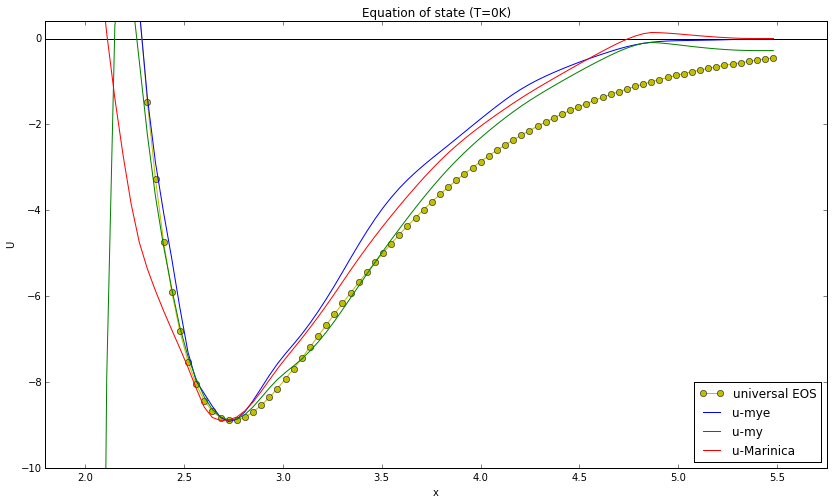

In [1041]:
plt.figure(figsize=(14,8))

plt.title('Equation of state (T=0K)')

plt.plot(ene_my[:,0]*2.74, [universal_eos(x, 'W') for x in ene_my[:,0]], 'yo-', label='universal EOS')
plt.plot(ene_mye[:,0]*2.74, ene_mye[:,3]/128, label='u-mye')
plt.plot(ene_my[:,0]*2.74, ene_my[:,3]/128 - 0.28, label='u-my')
plt.plot(ene_mar[:,0]*2.74, ene_mar[:,3]/128, label='u-Marinica')
#plt.scatter(stats['hyperparams']['pair'], np.zeros(len(stats['hyperparams']['pair'])))
#plt.vlines(stats['hyperparams']['pair']+[2.22], -10, 0)
#plt.vlines(stats['hyperparams']['edens'], -10, 0, colors='m')

#plt.vlines(np.linspace(2.25, 5.5, 14), -10, 0, colors='r')
#plt.vlines([2.26, 2.5 , 2.66, 2.74, 2.86, 3.06, 3.30, 3.62 , 3.9, 4.22, 4.54, 4.86, 5.18, 5.5], -10, 0, colors='g')

plt.hlines(0.0,0.5,6.0,lw=1)
plt.legend(loc='best')
plt.xlim(1.8, 5.75)
#plt.xlim(2.6, 2.85)
plt.ylim(-10,0.4)
#plt.ylim(-9.,-8.5)

plt.xlabel('x')
plt.ylabel(r'U')

In [139]:
[(key, targets[key]['weight']) for key in targets]

[('bcc_npt_langevin_3700K', 1.0),
 ('md', 1.0),
 ('vac_npt_langevin_2000K', 1.0),
 ('relax', 1.0),
 ('screw_111_npt_langevin_2000K', 1.0),
 ('bcc_npt_langevin_300K', 1.0),
 ('i111_npt_langevin_2000K', 1.0),
 ('eos', 1.0),
 ('fcc_npt_langevin_300K', 1.0),
 ('eos_fcc', 1.0),
 ('i110_npt_langevin_2000K', 1.0),
 ('liq_3700K', 1.0),
 ('liq_5000K', 1.0),
 ('eos_bcc', 1.0),
 ('bain', 1.0)]

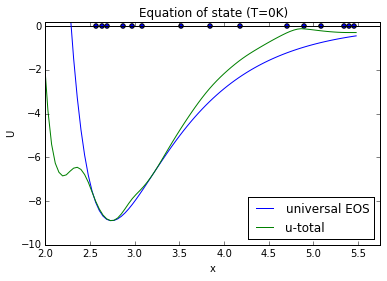

In [228]:
plt.title('Equation of state (T=0K)')
plt.plot(ene[:,0]*2.74, [universal_eos(x, 'W') for x in ene[:,0]], label='universal EOS')
plt.plot(ene[:,0]*2.74, ene[:,3]/128-0.3, label='u-total')
plt.scatter(stats['hyperparams']['pair'], np.zeros(len(stats['hyperparams']['pair'])))
plt.vlines([2.26, 2.5 , 2.66, 2.74, 2.86, 3.06, 3.30, 3.62 , 3.9, 4.22, 4.54, 4.86, 5.18, 5.5], -10, 0, colors='g')
plt.hlines(0.0,0.5,6.0,lw=1)
plt.legend(loc='best')
plt.xlim(2.0, 5.75)
#plt.xlim(2.6, 2.85)
plt.ylim(-10,0.2)
#plt.ylim(-9.,-8.5)

plt.xlabel('x')
plt.ylabel(r'U')

In [218]:
ff_id = -1

# spline knots
pair_r = stats['hyperparams']['pair']
rho_r = stats['hyperparams']['edens']

# parameters
pair_a = optimal_list[ff_id]['pair']
rho_a = optimal_list[ff_id]['edens']
many_a = optimal_list[ff_id]['embed']

In [219]:
# find electronic density maximum
rmax = max([(phi(r, rho_a, rho_r), r) for r in np.linspace(2.0, 4.9, 10000)])
rho_max, r_max = rmax
rho_max, r_max
rhomax = 12.0*phi(r_max, rho_a, rho_r)
rhomax

49.591759829005056

In [224]:
# Ranges of densities and separations

nr = 5000
rcut = pair_r[-1]#stats_opt['hyperparams'][-1]
dr = rcut/nr

rhomax = 12.0*phi(r_max, rho_a, rho_r)
print('rhomax:', rhomax)
rhomax = 10.0
nrho = 5000
drho = rhomax/nrho

ri = 1.0
ro = 2.0

# W properties
na = 74
ma = 183.84
lc = 3.1653
alat = 'bcc'

# System composition
n_el = 1
el_name = ['W']

('rhomax:', 49.591759829005056)


In [225]:
def u_trans(r, unucl, ueq, ri=1.0, ro=2.0):
    """Transition between the core and equillibrium potentials"""
    if r < ri:
        return unucl
    elif r < ro:
        x = (ro + ri - 2*r)/(ro - ri)
        eta = 3/16*x**5 - 5/8*x**3 + 15/16*x + 1/2
        return ueq + eta*(unucl - ueq)
    else:
        return ueq

In [226]:
# prepare lists of values
dens = np.linspace(0., rhomax-drho, nrho, endpoint=True)
r = np.linspace(0., rcut-dr, nr, endpoint=True)
r2 = np.linspace(0., rcut, 201)

fembd = [F(d, many_a) for d in dens] # W
edens = np.array([phi(x, rho_a, rho_r) if x > r_max else rho_max for x in r])

# 1. Cubic spline for r > r_o
f_outer = [V(x, pair_a, pair_r) for i, x in enumerate(r)]
# 2. Repulsive core for r < r_i (precalculate up to r_o)
f_inner = [0.0] + [u_core(x) for x in r[1:]]
# 3. Transition region for r_i < r < r_o
fpair = [x*u_trans(x, f_inner[i], f_outer[i]) for i, x in enumerate(r)]
#fpair = f_outer

In [227]:
# LAMMPS format

with open(os.path.join(pot_path, 'W_nocorr.eam.fs'), 'w') as fo:
    
    # Comment section
    fo.write('Comment 1\n')
    fo.write('Comment 2\n')
    fo.write('Comment 3\n')
    
    # Number of elements
    #fo.write(f"{n_el:5d} ")
    fo.write("{0:5d} ".format(n_el))

    for i in range(n_el):
        #fo.write(f"{el_name[i]:2}")
        fo.write("{0:2}".format(el_name[i]))
    fo.write("\n")
    
    # number of grid points, step size, and cutoff
    #fo.write(f"{nrho:5d}{drho:24.16e}{nr:5d}{dr:24.16e}{rcut:24.16e}\n")
    fo.write("{0:5d}{1:24.16e}{2:5d}{3:24.16e}{4:24.16e}\n".format(nrho, drho, nr, dr, rcut))

    # atomic number, mass, lattice size, lattice type
    #fo.write(f"{na:5d} {ma:14.4f} {lc:14.4f} {alat:10}\n")
    fo.write("{0:5d} {1:14.4f} {2:14.4f} {3:10}\n".format(na, ma, lc, alat))

    
    # Embeding function
    for i in range(nrho//4):
        fo.write("{0:20.12e}{1:20.12e}{2:20.12e}{3:20.12e}\n".format(*fembd[i*4:i*4+4]))
    
    # Electronic density
    for i in range(nr//4):
        fo.write("{0:20.12e}{1:20.12e}{2:20.12e}{3:20.12e}\n".format(*edens[i*4:i*4+4]))
        
    # Pair potential
    for i in range(nr//4):
        fo.write("{0:20.12e}{1:20.12e}{2:20.12e}{3:20.12e}\n".format(*fpair[i*4:i*4+4]))

In [ ]:
# Yuri's format

with open(os.path.join(pot_path, 'W_pair.yuri'), 'w') as fo:
    
    # Comment section
    fo.write('Comment 1\n')
    fo.write('Comment 2\n')
    fo.write('Comment 3\n')
    
    # Number of elements
    #fo.write(f"{n_el:5d} ")
    fo.write("{0:5d} ".format(n_el))

    for i in range(n_el):
        #fo.write(f"{el_name[i]:2}")
        fo.write("{0:2}".format(el_name[i]))
    fo.write("\n")
    
    # number of grid points, step size, and cutoff
    #fo.write(f"{nrho:5d}{drho:24.16e}{nr:5d}{dr:24.16e}{rcut:24.16e}\n")
    fo.write("{0:5d}{1:24.16e}{2:5d}{3:24.16e}{4:24.16e}\n".format(nrho, drho, nr, dr, rcut))

    # atomic number, mass, lattice size, lattice type
    #fo.write(f"{na:5d} {ma:14.4f} {lc:14.4f} {alat:10}\n")
    fo.write("{0:5d} {1:14.4f} {2:14.4f} {3:10}\n".format(na, ma, lc, alat))

    
    # Embeding function
    for i in range(nrho//4):
        fo.write("{0:20.12e}{1:20.12e}{2:20.12e}{3:20.12e}\n".format(*fembd[i*4:i*4+4]))
    
    # Electronic density
    for i in range(nr//4):
        fo.write("{0:20.12e}{1:20.12e}{2:20.12e}{3:20.12e}\n".format(*edens[i*4:i*4+4]))
        
    # Pair potential
    for i in range(nr//4):
        fo.write("{0:20.12e}{1:20.12e}{2:20.12e}{3:20.12e}\n".format(*fpair[i*4:i*4+4]))